In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.47.1
    Uninstalling transformers-4.47.1:
      Successfully uninstalled transformers-4.47.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.6/336.6 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.2.1
    Uninstalling accelerate-1.2.1:
      Successfully uninstalled accelerate-1.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.1 MB/s eta 0:00:00
  Attemptin

In [2]:
import pandas as pd
# df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/refs/heads/master/twitter_multi_class_sentiment.csv")
df = pd.read_csv('/content/IMDB_Dataset.csv')

In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,0
review,0
sentiment,0


In [4]:
df['sentiment_id'] = (df['sentiment'] == 'positive').astype(int)

In [5]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Dataset Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

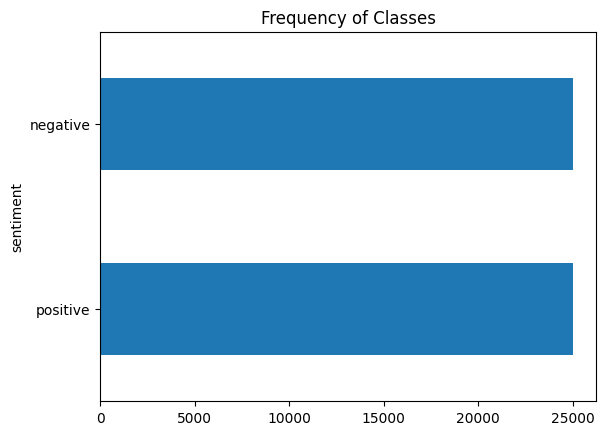

In [7]:
label_counts = df['sentiment'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per review'}, xlabel='sentiment'>

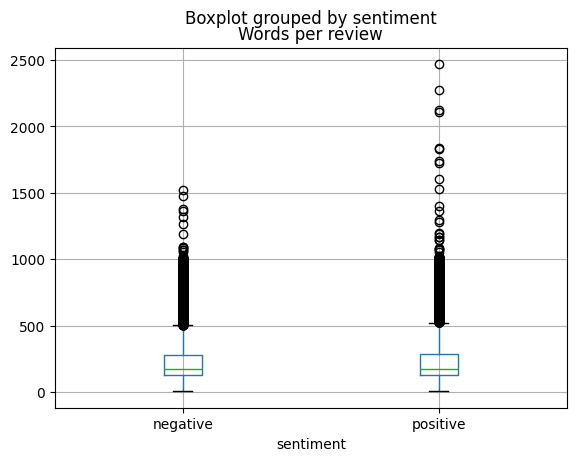

In [8]:
df['Words per review'] = df['review'].str.split().apply(len)
df.boxplot("Words per review", by="sentiment")

#Text to Token Conversion

In [9]:
from transformers import AutoTokenizer

In [10]:
model_ckpt = "bert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [11]:
len(tokenizer.vocab),tokenizer.vocab_size, tokenizer.model_max_length

(30522, 30522, 512)

# Data Loader and Train Test Split

In [12]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])
train.shape, test.shape, validation.shape

((35000, 4), (10000, 4), (5000, 4))

In [13]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [14]:
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'sentiment', 'sentiment_id', 'Words per review'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['review', 'sentiment', 'sentiment_id', 'Words per review'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['review', 'sentiment', 'sentiment_id', 'Words per review'],
        num_rows: 5000
    })
})

#Tokenization of emotion/sentiment data

In [15]:
dataset['train'][0]

{'review': "Fantastic Russian WWII movie. Like most Russian WWII movies, The Ascent is incredibly harrowing. It's also dense in its symbolism. The story follows two partisans, Sotnikov and Rybak (Boris Plotnikov and Vladimir Gostyukhin), who go on a mission to search for food. On their trip, they are spotted by German soldiers, who wound Sotnikov. Sotnikov, in turn, kills one of the Germans, which leads to trouble for the two partisans and everyone else they later run into. The greatest success of the film is its vivid sense of place. Russia is frozen and snowy, and it's hard not to feel that cold go straight to your own bones. Shepitko keeps her shot close to the characters, examining every crag of their faces. It was probably not the choice, but the film is framed 1.33:1, which gives the film a sense of claustrophobia. While the entire film is quite an achievement, I did feel that the first half was stronger than the second. My main complaint about the movie is that it develops into 

In [16]:
def tokenize(batch):
    temp= tokenizer(batch['review'], padding=True, truncation=True, return_token_type_ids=True,)
    return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 10392, 2845, 25755, 3185, 1012, 2066, 2087, 2845, 25755, 5691, 1010, 1996, 16354, 2003, 11757, 24560, 2075, 1012, 2009, 1005, 1055, 2036, 9742, 1999, 2049, 22050, 1012, 1996, 2466, 4076, 2048, 20762, 1010, 2061, 2102, 22576, 1998, 29431, 3676, 2243, 1006, 11235, 5436, 22576, 1998, 8748, 2175, 21756, 6968, 10606, 1007, 1010, 2040, 2175, 2006, 1037, 3260, 2000, 3945, 2005, 2833, 1012, 2006, 2037, 4440, 1010, 2027, 2024, 7282, 2011, 2446, 3548, 1010, 2040, 6357, 2061, 2102, 22576, 1012, 2061, 2102, 22576, 1010, 1999, 2735, 1010, 8563, 2028, 1997, 1996, 7074, 1010, 2029, 5260, 2000, 4390, 2005, 1996, 2048, 20762, 1998, 3071, 2842, 2027, 2101, 2448, 2046, 1012, 1996, 4602, 3112, 1997, 1996, 2143, 2003, 2049, 14954, 3168, 1997, 2173, 1012, 3607, 2003, 7708, 1998, 20981, 1010, 1998, 2009, 1005, 1055, 2524, 2025, 2000, 2514, 2008, 3147, 2175, 3442, 2000, 2115, 2219, 5944, 1012, 2016, 23270, 3683, 7906, 2014, 2915, 2485, 2000, 1996, 3494, 1010, 12843, 2296, 13675, 8490, 199

In [19]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [20]:
label2id = {x['sentiment']:x['sentiment_id'] for x in dataset ['train']}
id2label = {v:k for k,v in label2id.items()}
label2id, id2label

({'positive': 1, 'negative': 0}, {1: 'positive', 0: 'negative'})

#Model Building

In [21]:
from transformers import AutoModel
import torch

In [22]:
model= AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [23]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [24]:
model.config
model_two="bert-base-cased"

In [25]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
device


device(type='cuda')

In [27]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [33]:
from transformers import TrainingArguments

batch_size=32
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False
    )

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [34]:
! pip install evaluate

other than the above method, you can also use sklearn to calc accuracy

In [35]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#Build Model and Trainer

In [36]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-36-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [37]:
trainer.train()

OutOfMemoryError: CUDA out of memory. Tried to allocate 48.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 23.06 MiB is free. Process 3491 has 14.72 GiB memory in use. Of the allocated memory 14.56 GiB is allocated by PyTorch, and 35.51 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

In [ ]:
preds_output.predictions

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

In [ ]:
label2id

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.yabel("Actual")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

#Build Prediction function and save model

In [ ]:
text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)

In [ ]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [ ]:
# use pipeline for prediciton
from transformers import pipeline
classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

In [ ]:
# make a file app.py, and use this code


# import streamlit as st
# from transformers import pipeline

# st.title("Fine-Tuning BERT for Twitter Sentiment Classification")

# classifier = pipeline('text-classification', model='bert-base-uncased-sentiment-model')

# text = st.text_area("Enter Your Tweet Here")

# if st.button("Predict"):
#         result = classifier(text)
#         st.write("Prediction Result:", result)

#